# ML 101

## Evaluation (Regression)

The metrics that you choose to evaluate your machine learning algorithms are very important.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose.

In this notebook we explored the following performance metrics:
1. R2
2. MAE
3. MSE
4. RMSE




In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
import seaborn as sns
import numpy as np
import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

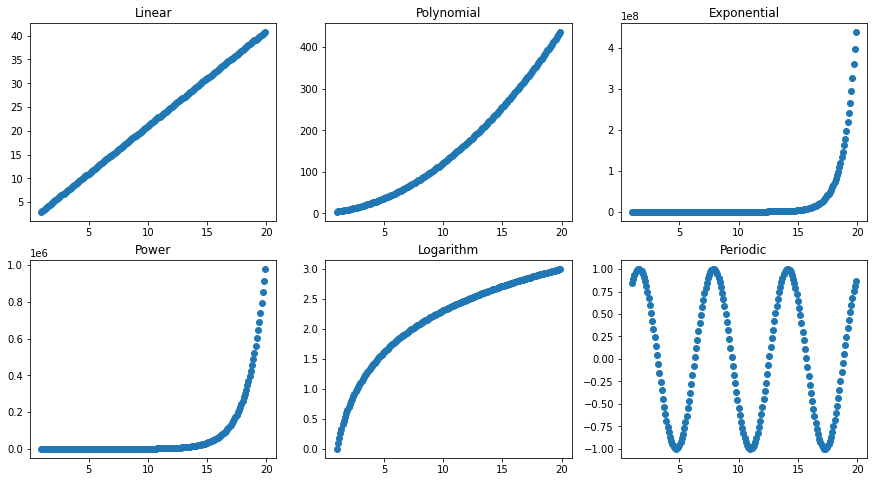

In [4]:
#create linear dataset
x = np.arange(start=1, stop=20, step=0.1)
x_long = np.arange(start=1, stop=30, step=0.1)
y_linear = x*2+1
y_poly = x**2+2*x+1
y_exp = math.e**x
y_pow = 2**x 
y_log = np.log(x)
y_sin = np.sin(x)

yys = [y_linear, y_poly, y_exp, y_pow, y_log, y_sin]
titles = ['Linear', 'Polynomial', 'Exponential', 'Power', 'Logarithm', 'Periodic']

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y, 'o')
  axs[r][c].set_title(titles[i])
plt.show()

## [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

LinearRegression fits a linear model with coefficients $w = (w_1,..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Linear R2 1.0 MAE 1.4304347180433595e-15 MSE 6.339950538276237e-30 RMSE 2.5179258405036946e-15
Polynomial R2 0.956125541046613 MAE 23.157894736842152 MSE 723.9052800000027 RMSE 26.905487916036808
Exponential R2 0.2827640113325046 MAE 37580725.866379544 MSE 3590520985631240.0 RMSE 59920956.14750519
Power R2 0.38654055747365457 MAE 98501.45562720479 MSE 20247027708.539665 RMSE 142292.0507566732
Logarithm R2 0.88963262005554 MAE 0.18606802082275897 MSE 0.05664806534987359 RMSE 0.23800854049775944
Periodic R2 0.017472197653164878 MAE 0.6315729685016409 MSE 0.4930102056082368 RMSE 0.7021468547307157


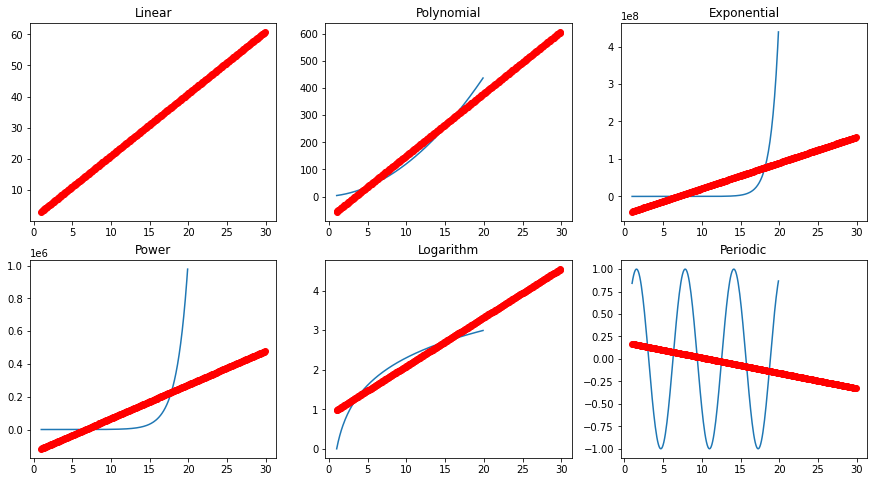

In [5]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = LinearRegression().fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()

## [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html)

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.


Linear R2 1.0 MAE 4.399278602226044e-12 MSE 2.580457236726795e-23 RMSE 5.0798201117035585e-12
Polynomial R2 0.9561254846845675 MAE 23.15789473684215 MSE 723.90620994383 RMSE 26.905505197706844
Exponential R2 6.45705711121991e-13 MAE 38475546.75478939 MSE 5006052460222345.0 RMSE 70753462.53168353
Power R2 0.38651330193452627 MAE 98142.8037372003 MSE 20247927268.669785 RMSE 142295.2116856705
Logarithm R2 0.8896322368479216 MAE 0.18596703127749498 MSE 0.05664826203815433 RMSE 0.2380089536932473
Periodic R2 0.016017678130191504 MAE 0.6331958211089079 MSE 0.493740050572796 RMSE 0.7026663863974112


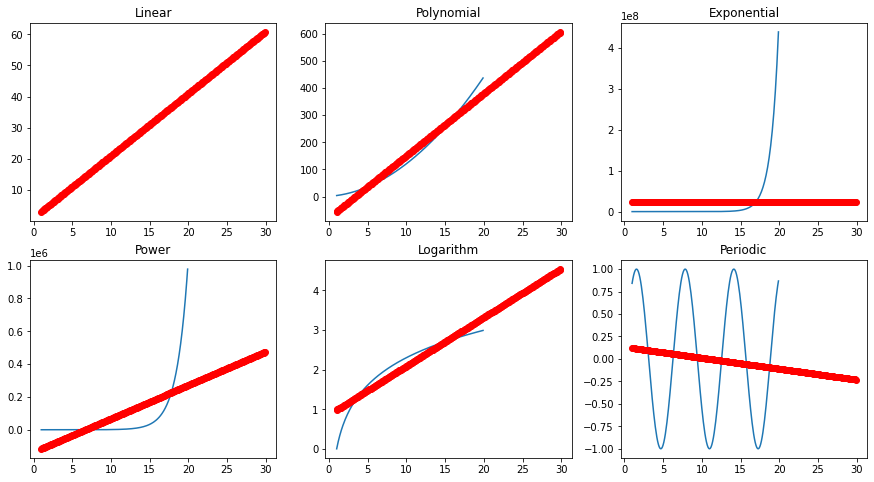

In [6]:
from sklearn.linear_model import BayesianRidge

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = BayesianRidge().fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()

## [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

Support Vector Machines (SVMs) are well known in classification problems. The use of SVMs in regression is not as well documented, however. These types of models are known as Support Vector Regression (SVR).

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In contrast to OLS, the objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, $ϵ$ (epsilon).

Kernel: linear
Linear R2 0.9999720052405265 MAE 0.05026457044757052 MSE 0.00336860940743763 RMSE 0.05803972266851066
Polynomial R2 0.9525979928735994 MAE 22.57315797729645 MSE 782.1079520970405 RMSE 27.96619302116469
Exponential R2 -0.11734696067956518 MAE 24271613.925768405 MSE 5593497501435509.0 RMSE 74789688.46997231
Power R2 -0.14038301907873318 MAE 74557.24013765917 MSE 37637967541.17716 RMSE 194005.07091614167
Logarithm R2 0.867872028541668 MAE 0.16577414273751515 MSE 0.06781708477164525 RMSE 0.2604171360944691
Periodic R2 0.0067154974971868064 MAE 0.6301096118210356 MSE 0.49840767420189686 RMSE 0.7059799389514527


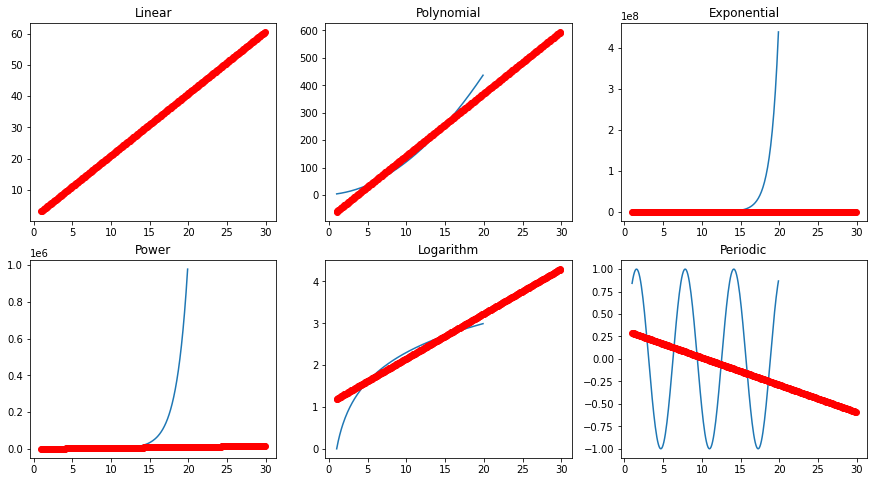

Kernel: poly
Linear R2 0.8453567374642585 MAE 3.4708121695727807 MSE 18.6082237809258 RMSE 4.313725046978052
Polynomial R2 0.9664445817779038 MAE 20.191980882815102 MSE 553.6465862608314 RMSE 23.529695838680777
Exponential R2 -0.11673638589415036 MAE 24254023.801982015 MSE 5590440932028832.0 RMSE 74769251.2469453
Power R2 0.016106692119455368 MAE 66782.18177228952 MSE 32473075945.92713 RMSE 180202.8744108349
Logarithm R2 0.5138490842569953 MAE 0.32840812591177515 MSE 0.2495258006375551 RMSE 0.4995255755590049
Periodic R2 0.00529519893855146 MAE 0.6353592471683367 MSE 0.49912034786135506 RMSE 0.7064844993779801


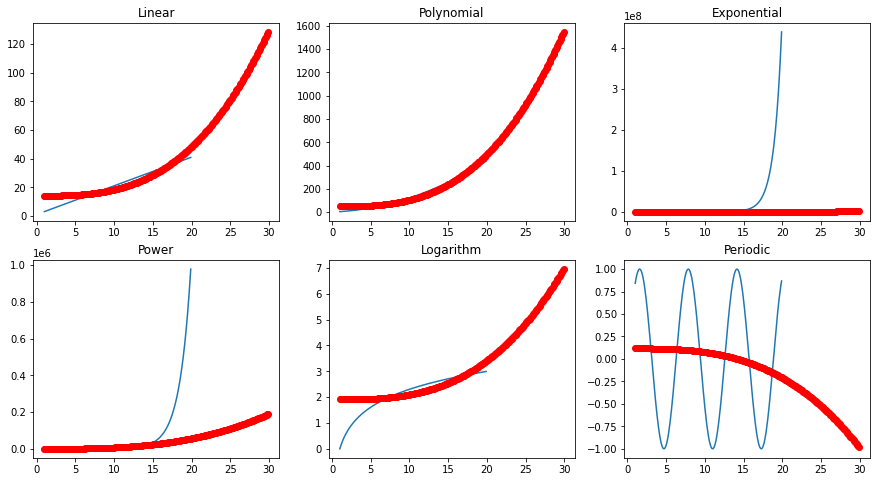

Kernel: rbf
Linear R2 0.9942507753208457 MAE 0.3903755178361986 MSE 0.6918042056426303 RMSE 0.8317476814771595
Polynomial R2 0.5352836803090237 MAE 58.68492949543692 MSE 7667.572559330591 RMSE 87.56467643593842
Exponential R2 -0.11742083048740337 MAE 24275850.7106979 MSE 5593867297568774.0 RMSE 74792160.669209
Power R2 -0.1724141871735143 MAE 76629.89234789892 MSE 38695145739.10518 RMSE 196710.81754470235
Logarithm R2 0.9884359190203169 MAE 0.06598185082397014 MSE 0.005935474914580509 RMSE 0.07704203342708776
Periodic R2 0.4373522354469912 MAE 0.4648918434207981 MSE 0.28232390923160244 RMSE 0.5313416125541105


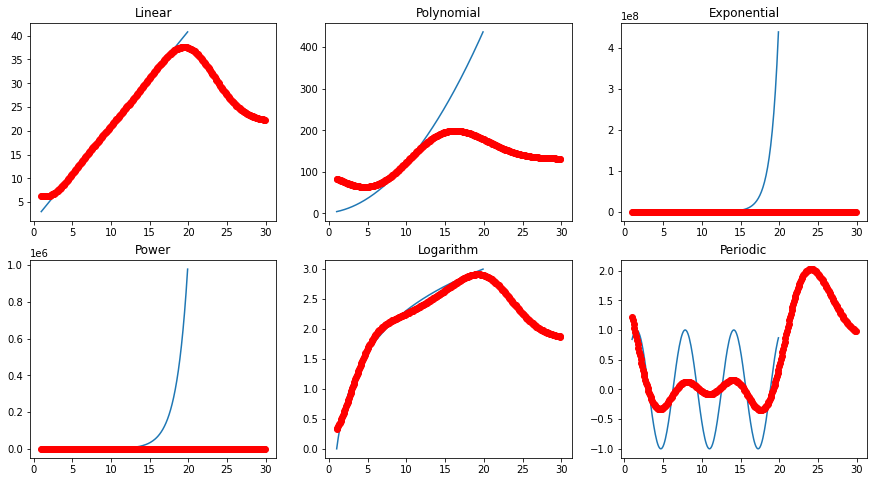

Kernel: sigmoid
Linear R2 -3.3016022323366503 MAE 19.05847849005299 MSE 517.6117966170701 RMSE 22.751083416335806
Polynomial R2 -0.20563334458555138 MAE 118.33347849005318 MSE 19892.31012094719 RMSE 141.04010110939083
Exponential R2 -0.11742143520466275 MAE 24275910.359246895 MSE 5593870324815098.0 RMSE 74792180.90693103
Power R2 -0.17271088192842177 MAE 76689.54089689354 MSE 38704938052.18598 RMSE 196735.70609369816
Logarithm R2 -338.4107201082206 MAE 10.116608890640173 MSE 174.2087260095663 RMSE 13.198815325989159
Periodic R2 -330.76117280042666 MAE 9.667613514564449 MSE 166.4702450398756 RMSE 12.902334867762331


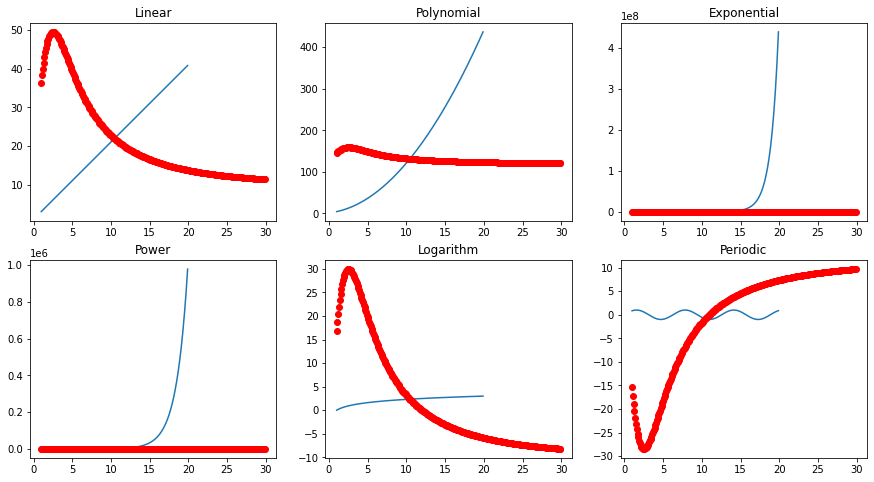

In [7]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
  print(f'Kernel: {k}')
  fig, axs = plt.subplots(2, 3)

  for i in range(len(yys)):
    y = yys[i]
    r = int(i/3)
    c = int(i%3)

    axs[r][c].plot(x, y)
    axs[r][c].set_title(titles[i])

    reg = SVR(kernel=k).fit(x.reshape(-1, 1), y)
    y_hat = reg.predict(x_long.reshape(-1, 1))
    axs[r][c].plot(x_long, y_hat, 'ro')

    y_pred = reg.predict(x.reshape(-1, 1))
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = math.sqrt(mse)

    print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

  plt.show()

## [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)




Activation: logistic
Linear R2 0.9983234759951628 MAE 0.3401160827815985 MSE 0.20173613350206449 RMSE 0.44915045753295685


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Polynomial R2 0.9992439685692911 MAE 2.513363992406131 MSE 12.474117233390773 RMSE 3.5318716331982922


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Exponential R2 -0.11773684508583804 MAE 24278679.29007467 MSE 5595449283226735.0 RMSE 74802735.80041532


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Power R2 -0.16973268540761577 MAE 75990.11396461778 MSE 38606643652.75526 RMSE 196485.73396752056
Logarithm R2 0.4263911994984141 MAE 0.36587786964680574 MSE 0.29441515085733 RMSE 0.54260036017066
Periodic R2 -0.09539199184458846 MAE 0.6542462108678672 MSE 0.5496429005174157 RMSE 0.7413790531957426


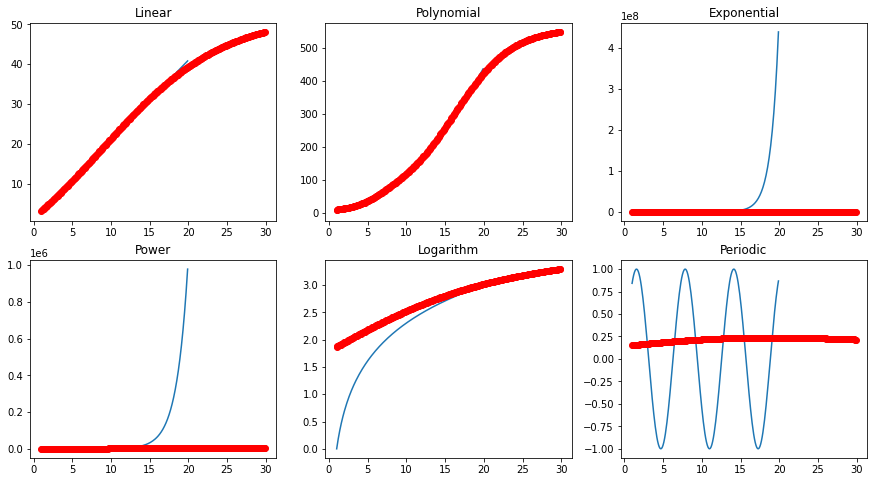

Activation: tanh
Linear R2 0.999152582799761 MAE 0.25136962364944176 MSE 0.10196971170475967 RMSE 0.3193269667672301


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Polynomial R2 0.9998719166009258 MAE 0.7900781898126846 MSE 2.113308085889288 RMSE 1.453722148792295


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Exponential R2 -0.11773696289565394 MAE 24278308.28951927 MSE 5595449872988854.0 RMSE 74802739.74253118


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Power R2 -0.16977359463948716 MAE 75835.52717399754 MSE 38607993848.53645 RMSE 196489.16979960105
Logarithm R2 0.31190005854773895 MAE 0.5876582441112834 MSE 0.3531798115552574 RMSE 0.5942893331999637
Periodic R2 0.03424192605205323 MAE 0.6266557429615806 MSE 0.48459553558446505 RMSE 0.6961289647647662


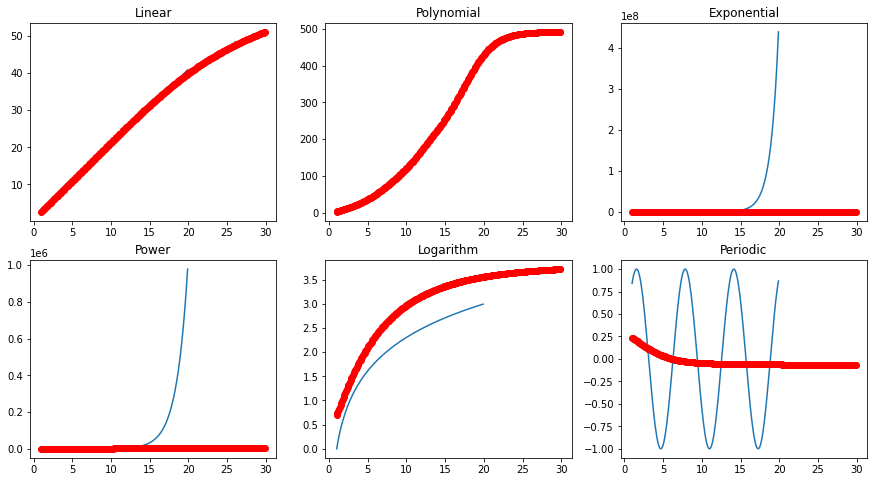

Activation: relu
Linear R2 0.9971168510194729 MAE 0.5131392159693239 MSE 0.34692931682682215 RMSE 0.5890070600823237
Polynomial R2 0.9999711627389603 MAE 0.4534629176437087 MSE 0.4757994975984503 RMSE 0.6897822102652766


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Exponential R2 -0.11520987113787062 MAE 24224310.723531045 MSE 5582799119077587.0 RMSE 74718131.12677261


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Power R2 0.260480836052714 MAE 102726.19323575679 MSE 24407587471.10451 RMSE 156229.27853352108
Logarithm R2 0.1460473166087578 MAE 0.4992842074111515 MSE 0.4383067482329522 RMSE 0.6620473912288698
Periodic R2 -0.020842461517692312 MAE 0.6427615803374652 MSE 0.5122356340902755 RMSE 0.7157063881860183


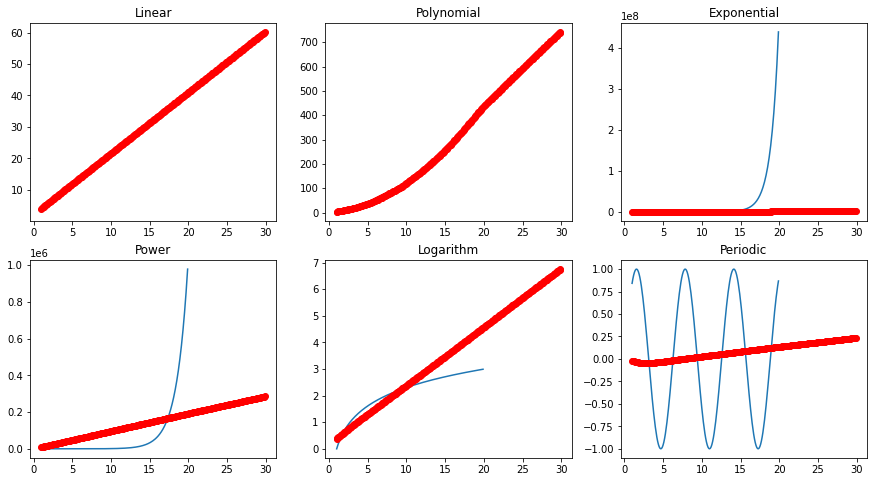

In [8]:
from sklearn.neural_network import MLPRegressor

activation = ['logistic', 'tanh', 'relu']

for a in activation:
  print(f'Activation: {a}')
  fig, axs = plt.subplots(2, 3)

  for i in range(len(yys)):
    y = yys[i]
    r = int(i/3)
    c = int(i%3)

    axs[r][c].plot(x, y)
    axs[r][c].set_title(titles[i])

    reg = MLPRegressor(activation=a, max_iter=10000, hidden_layer_sizes=(200,)).fit(x.reshape(-1, 1), y)
    y_hat = reg.predict(x_long.reshape(-1, 1))
    axs[r][c].plot(x_long, y_hat, 'ro')

    y_pred = reg.predict(x.reshape(-1, 1))
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = math.sqrt(mse)

    print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')
  plt.show()

## [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation (we will see this later) to select the size that minimises the mean-squared error.

While the method is quite appealing, it quickly becomes impractical when the dimension increases, i.e., when there are many independent variables.

Linear R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Polynomial R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Exponential R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Power R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Logarithm R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Periodic R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0


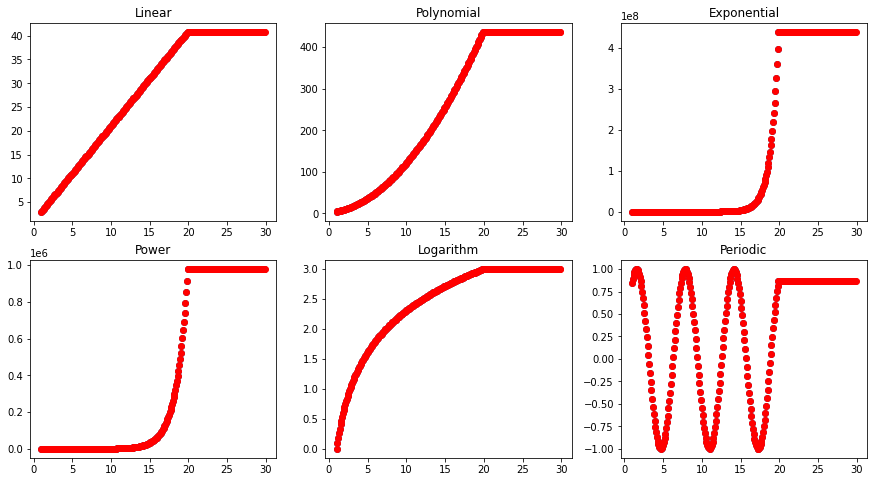

In [10]:
from sklearn.neighbors import KNeighborsRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y, 'o')
  axs[r][c].set_title(titles[i])

  reg = KNeighborsRegressor(n_neighbors=1).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()


# Decision Trees

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

Linear R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Polynomial R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Exponential R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Power R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Logarithm R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0
Periodic R2 1.0 MAE 0.0 MSE 0.0 RMSE 0.0


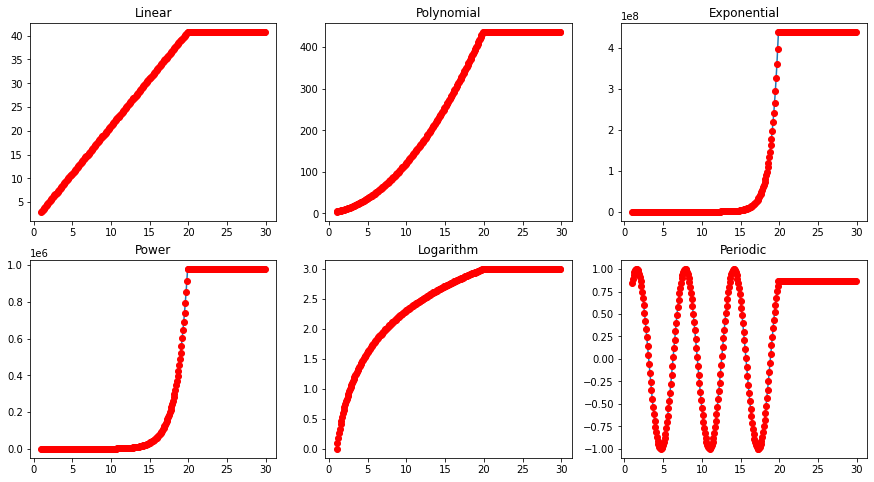

In [12]:
from sklearn.tree import DecisionTreeRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = DecisionTreeRegressor(max_depth=None).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()

## [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

A Random Forest Regression model is powerful and accurate. It usually performs great on many problems, including features with non-linear relationships. Disadvantages, however, include the following: there is no interpretability, overfitting may easily occur, we must choose the number of trees to include in the model.


Linear R2 0.9999865513259589 MAE 0.03671052631577821 MSE 0.0016182789473671705 RMSE 0.04022783796535889
Polynomial R2 0.999984686831244 MAE 0.41710947368423745 MSE 0.2526591547895191 RMSE 0.5026521210434898
Exponential R2 0.999345316853458 MAE 447496.9120575533 MSE 3277378176415.0874 RMSE 1810353.0529747747
Power R2 0.999647030077137 MAE 997.4307971764321 MSE 11649656.542996133 RMSE 3413.1593198964697
Logarithm R2 0.99993511254495 MAE 0.002997790823747993 MSE 3.330466661348964e-05 RMSE 0.0057710195471415305
Periodic R2 0.9996196973691901 MAE 0.011880166744356777 MSE 0.00019082724963210947 RMSE 0.013814023658301353


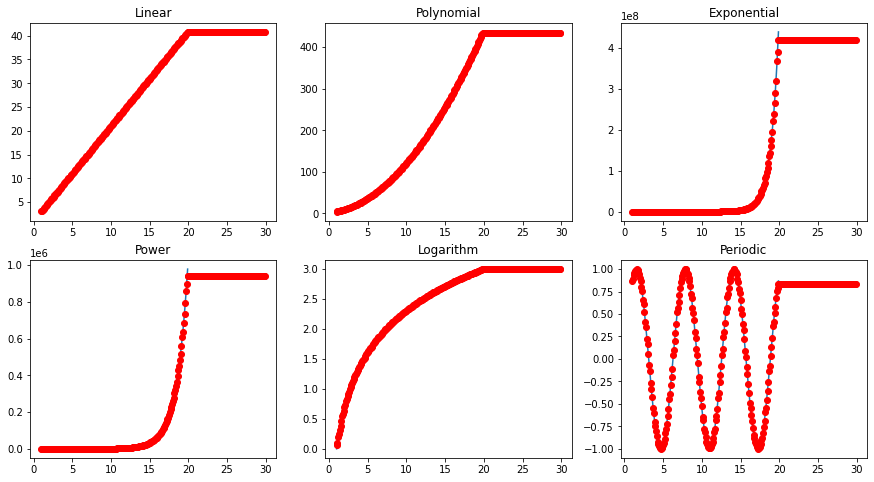

In [13]:
from sklearn.ensemble import RandomForestRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = RandomForestRegressor(n_estimators=200).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()

## [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

Linear R2 0.999986470785561 MAE 0.03163158207307388 MSE 0.001627970373438902 RMSE 0.04034811486846569
Polynomial R2 0.9999908862531336 MAE 0.28826020228857147 MSE 0.15037198485396505 RMSE 0.38777826764011036
Exponential R2 0.9999999513281052 MAE 7906.883058946354 MSE 243654058.8772641 RMSE 15609.422118620027
Power R2 0.9999997837733069 MAE 46.98578154302377 MSE 7136.491090777122 RMSE 84.47775500554641
Logarithm R2 0.9999904196262526 MAE 0.001657969757690567 MSE 4.917301093771848e-06 RMSE 0.0022174988373777895
Periodic R2 0.9999211834241035 MAE 0.003950488821707776 MSE 3.954837328292421e-05 RMSE 0.006288749739250578


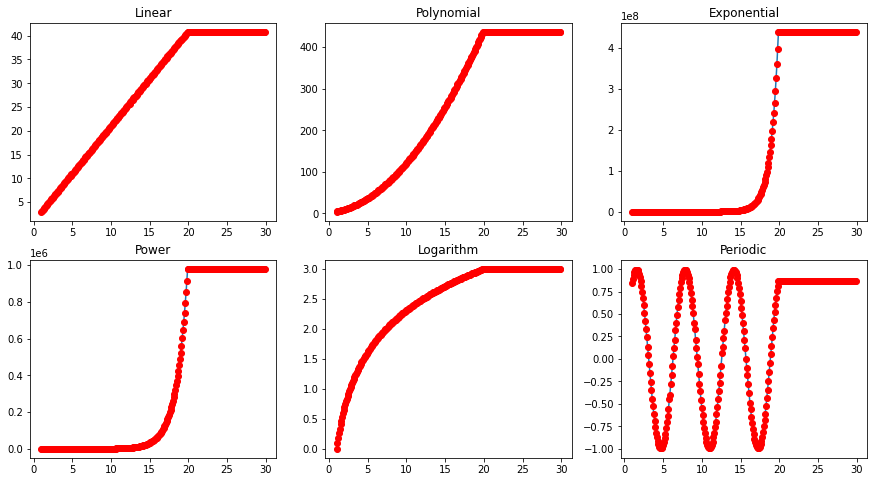

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = GradientBoostingRegressor(n_estimators=200).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()

## [Voting Ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

Prediction voting regressor for unfitted estimators.

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.




Linear R2 0.9999915626763243 MAE 0.024578947368421325 MSE 0.0010152631578947537 RMSE 0.031863194408200096
Polynomial R2 0.9889040751500018 MAE 11.596960526315813 MSE 183.0768692539481 RMSE 13.53059012955267
Exponential R2 0.8003332407857873 MAE 19134003.30480026 MSE 999542271189577.8 RMSE 31615538.445352748
Power R2 0.8356267746362718 MAE 49862.086130694326 MSE 5425084394.782161 RMSE 73655.17222016497
Logarithm R2 0.9723744884650004 MAE 0.09316757107349317 MSE 0.014179296306081189 RMSE 0.11907685042056323
Periodic R2 0.7513666386434263 MAE 0.31774508211909563 MSE 0.124758591370833 RMSE 0.3532118222410357


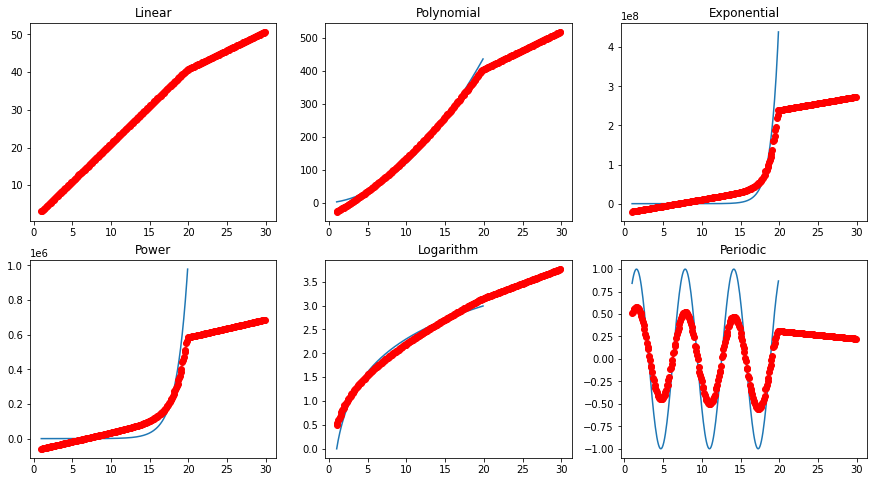

In [15]:
from sklearn.ensemble import VotingRegressor

rg1 = LinearRegression()
rg2 = RandomForestRegressor(n_estimators=10, random_state=1)

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = VotingRegressor([('lr', rg1), ('rf', rg2)]).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

  y_pred = reg.predict(x.reshape(-1, 1))
  r2 = r2_score(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = math.sqrt(mse)

  print(f'{titles[i]} R2 {r2} MAE {mae} MSE {mse} RMSE {rmse}')

plt.show()